In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from itertools import product
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load and preprocess the data
df = pd.read_csv("factorder.csv")
df_new=df.copy()
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')
df['Month'] = df['DateOrderedKey'].dt.to_period('M')
df = df[['QuantityOrdered', 'ArticleGroupName', 'Month']].dropna()
df_grouped = df.groupby(['ArticleGroupName', 'Month']).sum().reset_index()
pivot_table = df_grouped.pivot(index='Month', columns='ArticleGroupName', values='QuantityOrdered').fillna(0)


In [3]:
pivot_table

ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,Cancellation fee,DRESSES,Discount,ECOM return cost,Externa presentkort,Giftwrapping,HATS,...,Koncerndebitering,Not Available,OUTERWEAR,Provisionsintäkter/Commission,SWIMWEAR,Shipment,Stuff,TOPS,VAT,Övriga intäkter
Month,,,,,,,,,,,,,,,,,,,,,
2018-01,5293.0,6293.0,19923.0,4.0,10926.0,5.0,-388.0,0.0,0.0,7720.0,...,0.0,309212.0,12072.0,17.0,1038.0,35.0,364.0,28446.0,1.0,92.0
2018-02,10487.0,12464.0,39827.0,2.0,26806.0,8.0,-214.0,0.0,0.0,15874.0,...,0.0,0.0,30952.0,11.0,985.0,50.0,446.0,76767.0,5.0,8.0
2018-03,965.0,1146.0,4005.0,2.0,1930.0,3.0,-187.0,0.0,0.0,1712.0,...,0.0,4.0,1571.0,15.0,986.0,21.0,326.0,7132.0,0.0,39.0
2018-04,1586.0,3594.0,12519.0,0.0,6924.0,4.0,-105.0,0.0,0.0,3600.0,...,0.0,162702.0,3309.0,14.0,1016.0,17.0,45.0,20537.0,0.0,140.0
2018-05,2515.0,1451.0,3263.0,0.0,2449.0,2.0,-177.0,0.0,0.0,2230.0,...,0.0,0.0,955.0,13.0,722.0,36.0,117.0,5939.0,3.0,12.0
2018-06,1873.0,2635.0,8937.0,1.0,6477.0,1.0,-121.0,0.0,0.0,2615.0,...,0.0,0.0,3641.0,11.0,2520.0,14.0,53.0,14187.0,1.0,14.0
2018-07,2196.0,4980.0,16833.0,0.0,10319.0,1.0,-179.0,0.0,0.0,4406.0,...,0.0,0.0,5713.0,11.0,5994.0,20.0,21.0,28253.0,2.0,43.0
2018-08,4762.0,8842.0,30528.0,1.0,19835.0,0.0,-254.0,0.0,0.0,9318.0,...,0.0,0.0,11665.0,11.0,10498.0,31.0,148.0,52631.0,0.0,27.0
2018-09,1475.0,894.0,3653.0,3.0,3535.0,6.0,-181.0,0.0,0.0,1867.0,...,0.0,843410.0,2026.0,21.0,168.0,7.0,83.0,7038.0,0.0,27.0


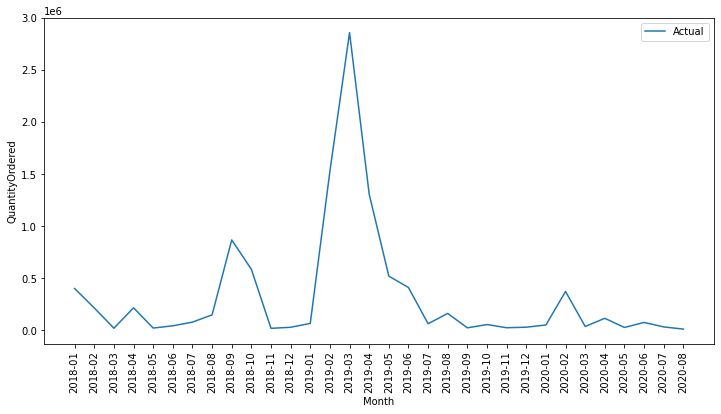

In [4]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index.astype(str), pivot_table.sum(axis=1), label='Actual')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

In [5]:

train_size = int(len(pivot_table) * 0.85)
train_data, test_data = pivot_table[:train_size], pivot_table[train_size:]
test_data



ArticleGroupName,ACCESSORIES,BODY AND ONESIE,BOTTOMS,Cancellation fee,DRESSES,Discount,ECOM return cost,Externa presentkort,Giftwrapping,HATS,...,Koncerndebitering,Not Available,OUTERWEAR,Provisionsintäkter/Commission,SWIMWEAR,Shipment,Stuff,TOPS,VAT,Övriga intäkter
Month,,,,,,,,,,,,,,,,,,,,,
2020-04,12169.0,5078.0,20549.0,6.0,16915.0,10.0,-347.0,0.0,429.0,9893.0,...,2.0,0.0,8943.0,4.0,1236.0,2.0,1.0,39303.0,2.0,127.0
2020-05,2116.0,1241.0,5145.0,6.0,3358.0,5.0,-590.0,0.0,382.0,2297.0,...,0.0,0.0,1568.0,5.0,665.0,4.0,0.0,11216.0,1.0,37.0
2020-06,4243.0,5002.0,14570.0,0.0,8078.0,2.0,-743.0,0.0,1580.0,7493.0,...,0.0,0.0,3656.0,1.0,1055.0,15.0,0.0,30490.0,1.0,72.0
2020-07,3267.0,1879.0,5138.0,0.0,3687.0,1.0,-288.0,0.0,1187.0,2474.0,...,2.0,1.0,4171.0,0.0,1089.0,7.0,1.0,9672.0,0.0,21.0
2020-08,1096.0,956.0,2425.0,0.0,1117.0,0.0,-86.0,0.0,33.0,776.0,...,0.0,0.0,554.0,1.0,539.0,5.0,0.0,3779.0,0.0,1.0


In [6]:
df

,QuantityOrdered,ArticleGroupName,Month
0,1.0,VAT,2018-01
1,1.0,DRESSES,2018-01
2,1.0,TOPS,2018-01
3,1.0,TOPS,2018-01
4,1.0,TOPS,2018-01
...,...,...,...
1048570,1.0,TOPS,2020-07
1048571,1.0,TOPS,2020-07
1048572,1.0,HATS,2020-07
1048573,1.0,TOPS,2020-07


In [7]:
df_new['DateOrderedKey'] = df_new['DateOrderedKey'].astype(str)
df_new.DateOrderedKey =  pd.to_datetime(df_new['DateOrderedKey'], format= '%Y-%m-%d')
df1 = df_new.groupby(['DateOrderedKey', 'ArticleGroupName']).sum('QuantityOrdered').fillna(0)
df1 = df1.reset_index()
df1 = df1[['DateOrderedKey', 'QuantityOrdered', 'ArticleGroupName']]

df1




,DateOrderedKey,QuantityOrdered,ArticleGroupName
0,2018-01-01,8.0,ACCESSORIES
1,2018-01-01,15.0,BODY AND ONESIE
2,2018-01-01,134.0,BOTTOMS
3,2018-01-01,64.0,DRESSES
4,2018-01-01,32.0,HATS
...,...,...,...
10106,2020-08-13,1.0,Provisionsintäkter/Commission
10107,2020-08-13,3.0,SWIMWEAR
10108,2020-08-13,4.0,Shipment
10109,2020-08-13,543.0,TOPS


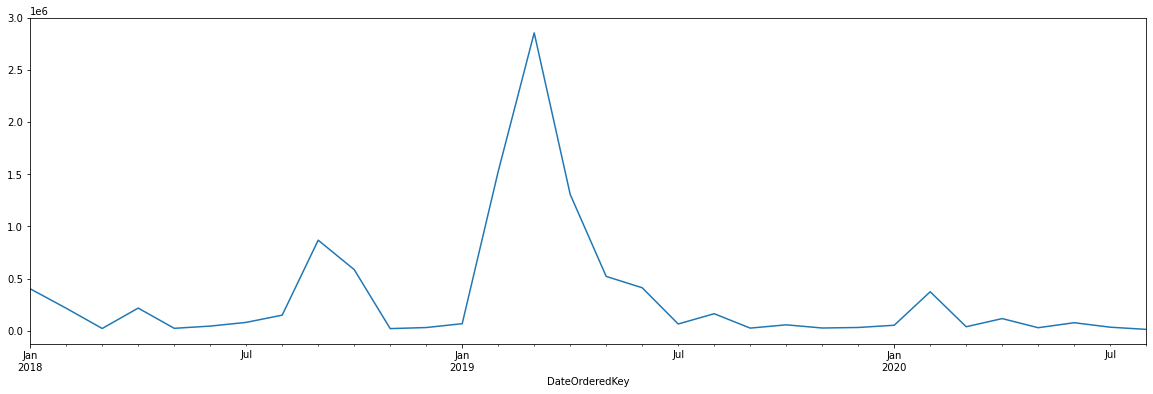

In [8]:


ts_month_avg = df1.set_index('DateOrderedKey')['QuantityOrdered'].resample('M').sum()
ts_month_avg
ts_month_avg.plot(figsize = (20, 6))
plt.show()

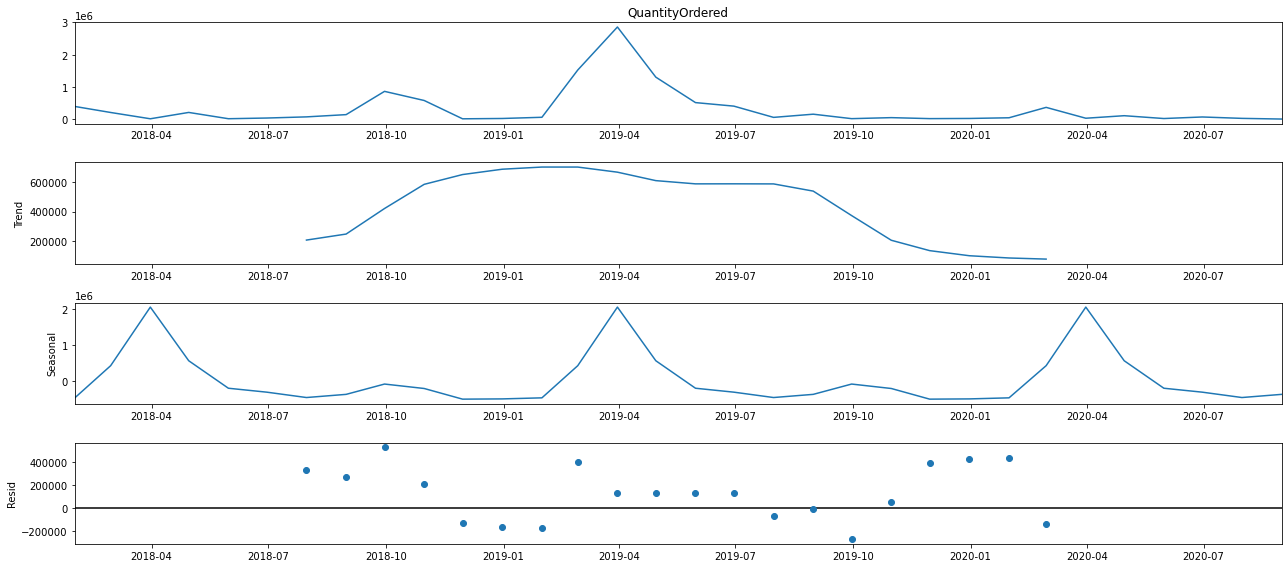

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)




In [12]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [13]:
#time series data is stationary
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -3.465029
p-value                         0.008932
#Lags Used                      1.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.155397
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


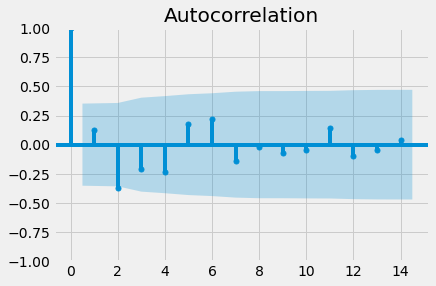

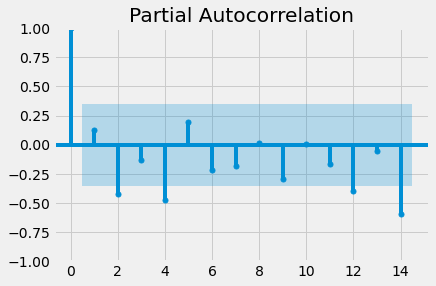

In [15]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
plot_acf(ts_t_adj, lags=14)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 14)
matplotlib.pyplot.show()

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')



# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            for column in train_data.columns:
                 mod = sm.tsa.statespace.SARIMAX(train_data[column],
                                            order=param,
                                            )

                 results = mod.fit()

                 print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
                  

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:548.2383259174536
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:535.1897389626179
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:598.4608288982452
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:151.9392991198478
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:579.8144767036215
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:199.5221360296607
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:365.83965184970856
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:296.36440629785716
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:453.7858636135799
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:550.333827464754
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:490.49136920173953
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:70.5198567968932
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:804.771776672877
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:576.8169592664985
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:207.66741716096678
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:508.8079456056219
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:295.2710433699428
ARIMA(0, 0, 0)x(0, 

In [17]:
best_model = SARIMAX(train_data[column], order=(0, 1, 1), seasonal_order=(0, 0, 0, 12)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:        Övriga intäkter   No. Observations:                   27
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -173.963
Date:                Wed, 31 May 2023   AIC                            351.925
Time:                        14:18:18   BIC                            354.442
Sample:                    01-31-2018   HQIC                           352.650
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9984     19.412     -0.051      0.959     -39.046      37.049
sigma2      3.353e+04   6.46e+05      0.052      0.959   -1.23e+06     1.3e+06
Ljung-Box (L1) (Q):                   0.49   Jarque-

In [18]:

    predicted_values = pd.DataFrame()
    for column in pivot_table.columns:
        predicted_values[column] = best_model.predict(start=pivot_table.index[0], end=pivot_table.index[-1])
    print(predicted_values)

         ACCESSORIES  BODY AND ONESIE     BOTTOMS  Cancellation fee  \
2018-01     0.000000         0.000000    0.000000          0.000000   
2018-02    89.113462        89.113462   89.113462         89.113462   
2018-03    49.203063        49.203063   49.203063         49.203063   
2018-04    45.838357        45.838357   45.838357         45.838357   
2018-05    69.189873        69.189873   69.189873         69.189873   
2018-06    57.825352        57.825352   57.825352         57.825352   
2018-07    50.560184        50.560184   50.560184         50.560184   
2018-08    49.485098        49.485098   49.485098         49.485098   
2018-09    46.685675        46.685675   46.685675         46.685675   
2018-10    44.506101        44.506101   44.506101         44.506101   
2018-11   135.267844       135.267844  135.267844        135.267844   
2018-12   124.184272       124.184272  124.184272        124.184272   
2019-01   116.605258       116.605258  116.605258        116.605258   
2019-0

In [19]:
# Calculate MAPE for the best model

pivot_table=pivot_table.fillna(0)
predicted_values=predicted_values.fillna(0)
#pivot_table = df_grouped.pivot(index='Month', columns='ArticleGroupName', values='QuantityOrdered').fillna(0)
mape = mean_absolute_percentage_error(pivot_table, predicted_values)

print("MAPE for the best model:", mape)

MSE = mean_squared_error(pivot_table, predicted_values)
print('The Mean square error for the SARIMAX model is', MSE)

rmse=np.sqrt(MSE)
print('The root mean square  error for the SARIMAX model is',rmse)


MAPE for the best model: 7.272293550610368e+16
The Mean square error for the SARIMAX model is 19293695748.74111
The root mean square  error for the SARIMAX model is 138901.74854457777


In [20]:
predicted_values

,ACCESSORIES,BODY AND ONESIE,BOTTOMS,Cancellation fee,DRESSES,Discount,ECOM return cost,Externa presentkort,Giftwrapping,HATS,...,Koncerndebitering,Not Available,OUTERWEAR,Provisionsintäkter/Commission,SWIMWEAR,Shipment,Stuff,TOPS,VAT,Övriga intäkter
2018-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,...,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462
2018-03,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,...,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063
2018-04,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,...,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357
2018-05,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,...,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873
2018-06,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,...,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352
2018-07,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,...,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184
2018-08,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,...,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098
2018-09,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,...,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675
2018-10,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,...,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101


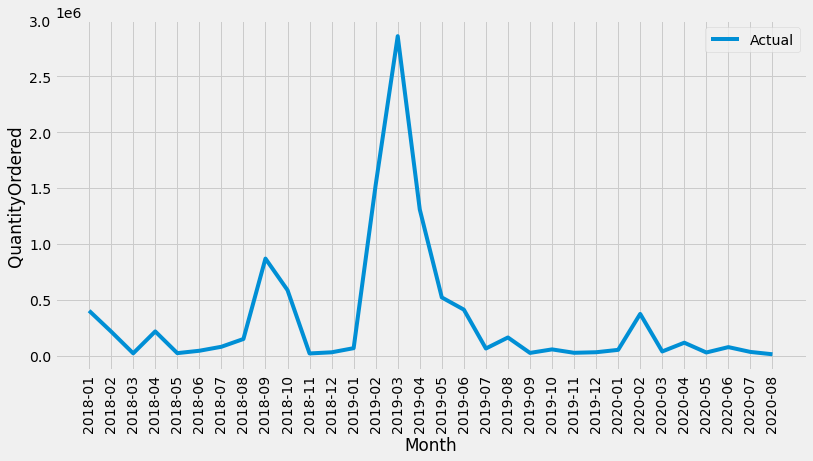

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(pivot_table.index.astype(str), pivot_table.sum(axis=1), label='Actual')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

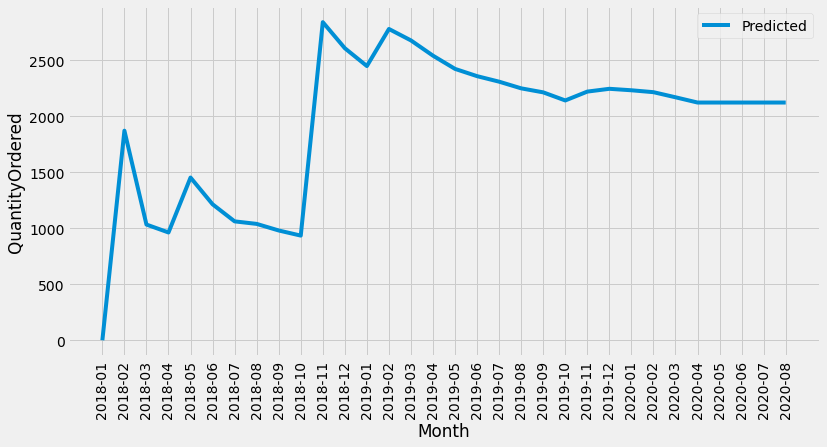

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(predicted_values.index.astype(str), predicted_values.sum(axis=1), label='Predicted')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()